# Mode hardcode regression

In [3]:
import pandas as pd
base = pd.read_csv('houses_price.csv')

In [13]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# quantity of registers
print(base.count())
print(base.shape)

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64
(21613, 21)


In [18]:
# axis x is the feet square
axis_x = base.iloc[ :, 5].values # values transform in numpy array
# search value, price of houses
axis_y = base.iloc[ :, 2:3 ].values # using 2:3, I don't need do reshape to transform in matrix
print('Feet square (meters)')
print(axis_x)
print('\n Price of houses')
print(axis_y)

# reshape the axis (transform in matrix)
axis_x = axis_x.reshape(-1, 1)

print('\n\n shape')
print(axis_x.shape)
print(axis_y.shape)

Feet square (meters)
[1180 2570  770 ... 1020 1600 1020]

 Price of houses
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


 shape
(21613, 1)
(21613, 1)


In [22]:
# scaler the variables X and Y
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(axis_x)
y_scaled = scaler_y.fit_transform(axis_y)

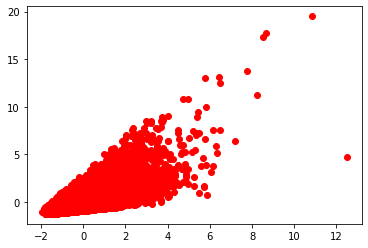

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_scaled, y_scaled, 'o', color='red')

In [31]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.1.0'

In [38]:
# Use formula of simple regression y = b0 + b1 * x

np.random.seed(1)
random_number = np.random.rand(2)

b0 = tf.Variable(random_number[0])
b1 = tf.Variable(random_number[1])

In [67]:
# training the algorithm using batch, 32 in 32
batch_size = 32
x_placeholder = tf.placeholder(tf.float64, [batch_size, 1])
y_placeholder = tf.placeholder(tf.float64, [batch_size, 1])



In [68]:
y_model = b0 + b1 * x_placeholder
error = tf.losses.mean_squared_error(y_placeholder, y_model)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
training = optimizer.minimize(error)

initialize_variables = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run( initialize_variables )
    for i in range(10000):
        indexes = np.random.randint(len(axis_x), size=batch_size)
        feed = { x_placeholder: x_scaled[indexes], y_placeholder: y_scaled[indexes] }
        sess.run(training, feed_dict=feed)
    b0_final, b1_final = sess.run([b0, b1])

In [69]:
print('Coefficients finals => ', b0_final, b1_final)

Coefficients finals =>  -6.294642231821748e-05 0.7064307466388234


In [70]:
previsions = b0_final + b1_final * x_scaled
previsions

array([[-0.69224853],
       [ 0.37691276],
       [-1.00761265],
       ...,
       [-0.81531746],
       [-0.3691926 ],
       [-0.81531746]])

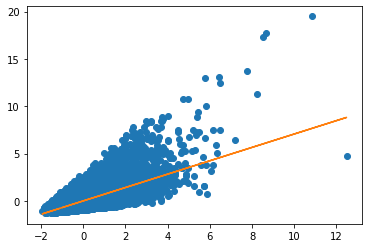

In [71]:
plt.plot(x_scaled, y_scaled, 'o')
plt.plot(x_scaled, previsions)

In [74]:
# verify errors
y1 = scaler_y.inverse_transform(y_scaled)
previsions1 = scaler_x.inverse_transform(previsions)
print('Invert the scale')
print(y1)
print(previsions1)

Invert the scale
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
[[1444.12508245]
 [2426.06382027]
 [1154.48847632]
 ...
 [1331.09616298]
 [1740.82599603]
 [1331.09616298]]


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y1, previsions1)
mse = mean_squared_error(y1, previsions1)
print('MAE and MSE => ', mae, mse)

MAE and MSE =>  538008.2998414907 423895063221.7312


# Using estimators for regression

In [1]:
import pandas as pd
base = pd.read_csv('houses_price.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
base.shape

(21613, 21)

In [3]:
axis_x_estimator = base.iloc[:, 5:6].values
axis_y_estimator = base.iloc[:, 2:3].values
print(axis_x_estimator)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [4]:
# scaler the values
from sklearn.preprocessing import StandardScaler
scaler_axis_x = StandardScaler()
scaler_axis_y = StandardScaler()

scalered_axis_x = scaler_axis_x.fit_transform( axis_x_estimator )
scalered_axis_y = scaler_axis_y.fit_transform( axis_y_estimator )


In [5]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
# create columns 
columns = [tf.feature_column.numeric_column('x', shape=[1])]

# create the model
regressor = tf.estimator.LinearRegressor(feature_columns=columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph2kka0no', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
# divide the base between test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    scalered_axis_x,
    scalered_axis_y,
    test_size=0.3,
)

In [10]:
# Generate model using batch registers
function_train = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=32,
    num_epochs=None,
    shuffle= True
)

function_test = tf.estimator.inputs.numpy_input_fn(
    {'x': x_test},
    y_test,
    batch_size=32,
    num_epochs=1000,
    shuffle=False
)

In [11]:
#training model
regressor.train(
    input_fn=function_train,
    steps=10000,
)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmph2kka0no/model.ckpt.
INFO:tensorflow:loss = 329.18784, step = 1
INFO:tensorflow:global_step/sec: 210.727
INFO:tensorflow:loss = 13.312934, step = 101 (0.47

INFO:tensorflow:global_step/sec: 398.092
INFO:tensorflow:loss = 7.317271, step = 4401 (0.250 sec)
INFO:tensorflow:global_step/sec: 272.897
INFO:tensorflow:loss = 13.377101, step = 4501 (0.367 sec)
INFO:tensorflow:global_step/sec: 122.55
INFO:tensorflow:loss = 30.61747, step = 4601 (0.815 sec)
INFO:tensorflow:global_step/sec: 217.782
INFO:tensorflow:loss = 9.470055, step = 4701 (0.472 sec)
INFO:tensorflow:global_step/sec: 369.089
INFO:tensorflow:loss = 18.742695, step = 4801 (0.262 sec)
INFO:tensorflow:global_step/sec: 362.853
INFO:tensorflow:loss = 26.450844, step = 4901 (0.273 sec)
INFO:tensorflow:global_step/sec: 395.185
INFO:tensorflow:loss = 18.271437, step = 5001 (0.255 sec)
INFO:tensorflow:global_step/sec: 435.811
INFO:tensorflow:loss = 24.607895, step = 5101 (0.226 sec)
INFO:tensorflow:global_step/sec: 623.533
INFO:tensorflow:loss = 12.141912, step = 5201 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.256
INFO:tensorflow:loss = 8.977308, step = 5301 (0.165 sec)
INFO:tensorflow

In [12]:
metrics_training = regressor.evaluate(
    input_fn= function_train, 
    steps=10000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-23T18:57:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph2kka0no/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Inference Time : 15.99679s
INFO:tensorflow:Finished evaluation at 2020-03-23-18:57:30
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.50250053, global_step = 10000, label/mean = -0.0023149794, loss = 16.080017, prediction/mean = 0.009

In [13]:
metrics_test = regressor.evaluate(
    input_fn= function_test,
    steps=10000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-23T18:58:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph2kka0no/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Inference Time : 15.96815s
INFO:tensorflow:Finished evaluation at 2020-03-23-18:58:43
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.51950943, global_step = 10000, label/mean = 0.005920722, loss = 16.624302, prediction/mean = 0.01116

In [14]:
# metrics training
metrics_training

{'average_loss': 0.50250053,
 'label/mean': -0.0023149794,
 'loss': 16.080017,
 'prediction/mean': 0.009601297,
 'global_step': 10000}

In [15]:
# metrics tests
metrics_test

{'average_loss': 0.51950943,
 'label/mean': 0.005920722,
 'loss': 16.624302,
 'prediction/mean': 0.011161863,
 'global_step': 10000}

In [19]:
# Create new registers
import numpy as np
new_houses = np.array([[800], [900], [1000]])
new_houses = scaler_axis_x.fit_transform(new_houses)

In [20]:
function_prevision = tf.estimator.inputs.numpy_input_fn(
    {'x': new_houses},
    shuffle=False
)

previsions = regressor.predict(input_fn= function_prevision)
# cast generate to list
list(previsions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph2kka0no/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([-0.84122765], dtype=float32)},
 {'predictions': array([0.01001125], dtype=float32)},
 {'predictions': array([0.86125016], dtype=float32)}]

In [23]:
print('values predicted')
for p in regressor.predict(input_fn=function_prevision):
    print(scaler_axis_x.inverse_transform(p['predictions']))

values predicted
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmph2kka0no/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[831.314]
[900.81744]
[970.3208]
